In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import curve_fit
from scipy.interpolate import UnivariateSpline, SmoothBivariateSpline
from scipy.stats import linregress

import matplotlib as mpl
mpl.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['font.size'] = 11

In [2]:

color_dict = {
    'D4 + 2x peptide': '#223E60',
    'D4 + 1.5x peptide': '#4D758F',
    'D4 + 1x peptide': '#77ABBD',
    'D4': '#E63946', 
    'WT': '#1D3557',
    'Buffer': '#232323'
}

In [3]:
data = pd.read_excel('results filtered.xlsx', index_col=0)

In [4]:
data.head()

,Well,Condition,Run,NaCl [mM],Protein [uM],Well_volume,exp_id,Sample Condition,Time condensed [min],Delta Abs Run 1,Delta Abs Run 2,Time to condense [min],Change in Delta Abs,Time to condense Run 2 [min],Change in time to condense [min],Change in min abs
0,G13,D4 + 1x peptide,NaN,125,30,50.0,20250512 getting desperate d4 pep 30 prot 125 ...,D4 + 1x peptide 125 mM NaCl,20.284818,0.707134,0.397770,9.715182,-0.309365,11.514558,1.799375,0.034243
1,G14,D4 + 1x peptide,NaN,125,30,50.0,20250512 getting desperate d4 pep 30 prot 125 ...,D4 + 1x peptide 125 mM NaCl,19.524953,0.689307,0.382994,10.475047,-0.306313,11.488731,1.013684,0.033568
2,G15,D4 + 1x peptide,NaN,125,30,50.0,20250512 getting desperate d4 pep 30 prot 125 ...,D4 + 1x peptide 125 mM NaCl,19.769135,0.660875,0.317157,10.230865,-0.343718,11.733635,1.502770,0.064409
3,I13,D4 + 1x peptide,NaN,150,30,50.0,20250512 getting desperate d4 pep 30 prot 125 ...,D4 + 1x peptide 150 mM NaCl,19.323163,0.614169,0.359597,10.676837,-0.254573,11.118991,0.442154,-0.064486
4,I14,D4 + 1x peptide,NaN,150,30,50.0,20250512 getting desperate d4 pep 30 prot 125 ...,D4 + 1x peptide 150 mM NaCl,19.440056,0.676127,0.367113,10.559944,-0.309015,10.444562,-0.115382,0.021714


In [5]:
data['Relative Change in Delta Abs'] = data['Delta Abs Run 2'] / data['Delta Abs Run 1']

In [6]:
# Exclude inaccurately prepared runs
data_filtered = data[((data['exp_id'].map(lambda e: any(map(lambda w: w != 'science', e.split())))))]

# Absorbance recovery vs total condensation exposure

Text(37.30972222222222, 0.5, '$\\Delta\\mathrm{Abs_2}$/$\\Delta\\mathrm{Abs_1}$')

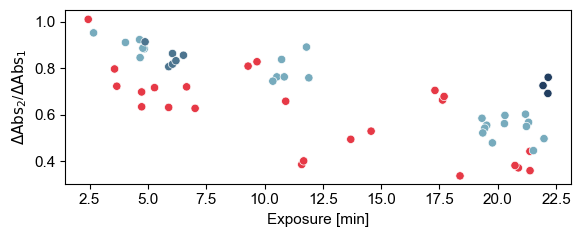

In [7]:
plt.figure(figsize=(5.907, 2.5))
sns.scatterplot(data_filtered[data_filtered['Condition'] != 'WT'],
               x='Time condensed [min]',
               y='Relative Change in Delta Abs',
               hue='Condition',
               palette=color_dict,
               legend=False)
plt.tight_layout()
plt.ylim(top=1.05)
plt.xlabel('Exposure [min]')
plt.ylabel(r'$\Delta\mathrm{Abs_2}$/$\Delta\mathrm{Abs_1}$')

# Condensation lag time vs salt concentration

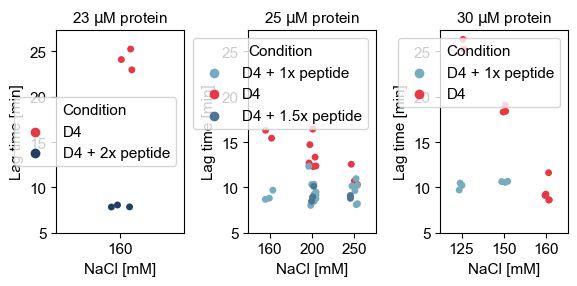

In [8]:
fig, axes = plt.subplots(1,3, figsize = (5.907, 3))

plot_data = data_filtered[data_filtered['Condition'] != 'WT']

prots = plot_data['Protein [uM]'].unique()
prots.sort()

for i in range(3):
    
    prot = prots[i]
    bp = False
    if bp:
        sns.boxplot(plot_data[plot_data['Protein [uM]'] == prot],
                   x='NaCl [mM]',
                   y='Time to condense [min]',
                   hue='Condition',
                   palette=color_dict,
                   ax=axes[i])
    
    sns.stripplot(plot_data[plot_data['Protein [uM]'] == prot],
               x='NaCl [mM]',
               y='Time to condense [min]',
               hue='Condition',
               palette=color_dict,
               ax=axes[i],
                 dodge=False)
    
    axes[i].set_ylim(5, plot_data['Time to condense [min]'].max()+1)
    axes[i].set_title(f'{prot}' + r' $\mathrm{\mu}$M protein', fontsize=11)
    if i != 0:
        axes[i].set_ylabel('')
        
    axes[i].set_yticks([5, 10, 15, 20, 25])
    axes[i].set_ylabel('Lag time [min]')
    
plt.tight_layout()